### quick example on low-pass filter

In [1]:
import numpy as np
from cmath import pi

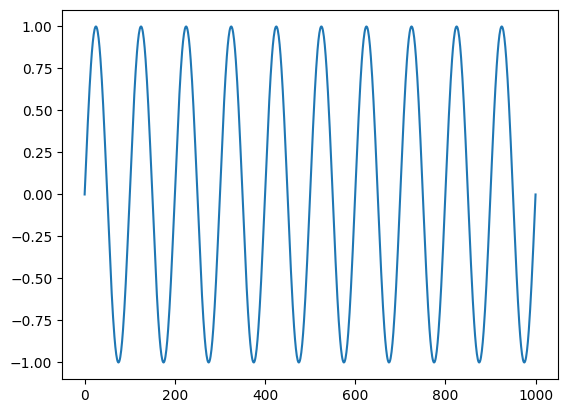

In [2]:
# a time series
t = np.linspace(0, 1000, 1000)

# # a sine wave with noise
u = np.sin(2*pi*t/100) 

# # a square wave
# u = np.sign(np.sin(2*pi*t/100))

# plot the time series
import matplotlib.pyplot as plt
plt.plot(t, u)

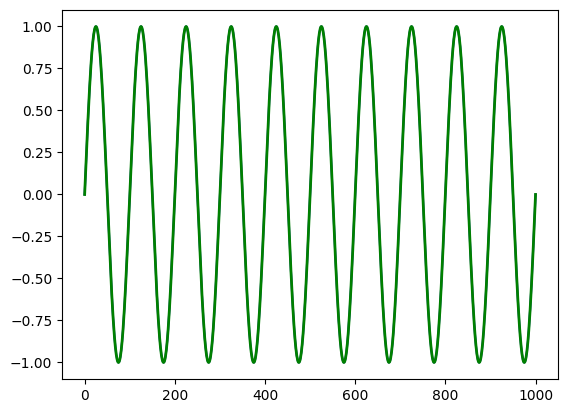

In [3]:
# low pass filter
from scipy.signal import butter, lfilter
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs # Nyquist frequency
    normal_cutoff = cutoff / nyq # cutoff frequency
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order) # get the filter coefficients
    y = lfilter(b, a, data) # apply the filter
    return u

# filter the time series
fs = 1000 # sampling frequency
cutoff = 400 # cutoff frequency
y = butter_lowpass_filter(u, cutoff, fs, order=2)

# plot the filtered time series with original in different colors
plt.plot(t, u, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')

### we'll design our own low pass RC filter with parameters following Michael's "JEB2013 sims" code

Assume fly speed is: speed_cms = 23 cm/s.

distance step size: step_cm = 0.05 cm

time step size: step_s = 0.05/23 s = T

Low pass filter for ommatidium (RC time): tau_HR = 30 ms = $\tau_{HR}$  
$A = 1 - \frac{2 \tau_{HR}}{T}$  
$B = 1 + \frac{2 \tau_{HR}}{T}$  

Let $u(t)$ be the input (raw ommatidia value) at time t, and $y(t)$ be the output (after lowpass filter) at time t. Then  
$y(t) = \frac{u(t) + u(t-1) - A y(t-1)}{B}$


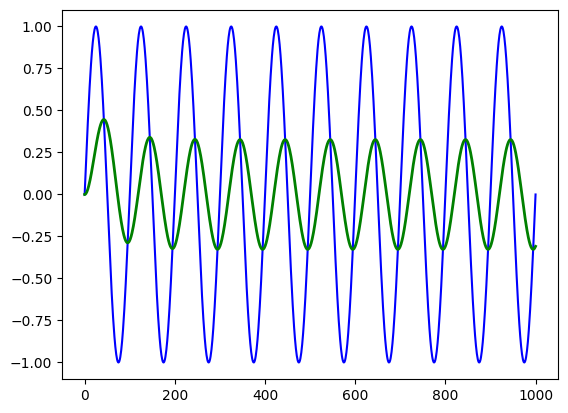

In [8]:
# low pass filter
T = 0.05/23 # sampling period
tau_HR = 0.1 # time constant of the low pass filter
A = 1 - 2*tau_HR/T
B = 1 + 2*tau_HR/T 

yf = np.zeros(t.shape) # initialize the filtered time series
for i in range(1, len(t)):
    yf[i] = (u[i] + u[i-1] - A*yf[i-1])/B # apply the filter

# plot the filtered time series
plt.plot(t, u, 'b-', label='data')
plt.plot(t, yf, 'g-', linewidth=2, label='filtered data')

# print(yf)


In [5]:
# # low pass filter, alternative form
# T = 0.05/23 # sampling period
# tau_HR = 1 # time constant of the low pass filter
# alpha = T/(tau_HR+T) # alpha
# y = np.zeros(t.shape) # initialize the filtered time series
# for i in range(1, len(t)):
#     y[i] = alpha*u[i] + (1-alpha)*y[i-1] # apply the filter

# # plot the filtered time series
# plt.plot(t, u, 'b-', label='data')
# plt.plot(t, yf, 'g-', linewidth=2, label='filtered data')
